# Laboratory 8: Parsing

# Imports

In [1]:
### CREATE VIRTUAL DISPLAY ###
!apt-get install -y xvfb # Install X Virtual Frame Buffer
import os
import pandas as pd
os.system('Xvfb :1 -screen 0 1600x1200x16  &')    # create virtual display with size 1600x1200 and 16 bit color. Color can be changed to 24 or 8
os.environ['DISPLAY']=':1.0'    # tell X clients to use our virtual DISPLAY :1.0.

%matplotlib inline

### INSTALL GHOSTSCRIPT (Required to display NLTK trees) ###
!apt install ghostscript python3-tk

from IPython.display import display

zsh:1: command not found: apt-get
Unable to locate an executable at "/Library/Java/JavaVirtualMachines/jdk1.8.0_77.jdk/Contents/Home/bin/apt" (-1)


In [2]:
import nltk
from nltk import CFG, ChartParser
from nltk.corpus import stopwords

In [3]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/Eric/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/Eric/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /Users/Eric/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Functions

In [3]:
import time

In [7]:
# Constituency parsing
# Resulting Tree, number of edges and list of explored edges
def store_info(NAME=None, TREE_LIST=None, EDGE_LIST=None, OMMITED=None,TIME=None):
  d = dict()
  d[NAME] = [TREE_LIST, EDGE_LIST, OMMITED,TIME]
  return d
#Chart Parser - Baseline for edge comparisson 
def get_chart_parse(grammar, sentence):
  tic = time.time()
  parser = ChartParser(grammar)
  parse = parser.parse(sentence)
  ts = []
  for x in parse: 
    ts.append(x)
  PARSE = parser.chart_parse(sentence)
  EDGES = PARSE.num_edges()
  toc = time.time()
  LIST_EDGES = []
  for x in PARSE.edges(): 
    LIST_EDGES.append(str(x))
  print(f"\n>>>>>>>>>>>>>>>> Chart Parser <<<<<<<<<<<<<<<<\n")
  print(f"There are {len(ts)} trees\n")
  for x in ts: 
    display(x)
  print(f"Number of edges = {EDGES}\n")
  print(f"List of Edges:\n")
  for idx,x in enumerate(LIST_EDGES):
    print(f"Edge {idx+1} : {x}")
  final_t = toc-tic
  d = store_info(NAME = 'CHART_PARSE', TREE_LIST = len(ts), EDGE_LIST=len(LIST_EDGES),OMMITED=None,TIME=final_t)
  return LIST_EDGES,d

# BottomUpChartParser
def get_BUChartParser(grammar, sentence,CP=None):
  tic = time.time()
  parser = nltk.BottomUpChartParser(grammar)
  parse = parser.parse(sentence)
  ts = []
  for x in parse: 
    ts.append(x)
  PARSE = parser.chart_parse(sentence)
  EDGES = PARSE.num_edges()
  LIST_EDGES = []
  toc = time.time()
  for x in PARSE.edges(): 
    LIST_EDGES.append(str(x))
  print(f"\n>>>>>>>>>>>>>>>> BottomUpChartParser <<<<<<<<<<<<<<<<\n")
  print(f"There are {len(ts)} trees\n")
  for x in ts: 
    display(x)
  print(f"Number of edges = {EDGES}\n")
  print(f"List of Edges:\n")
  for idx,x in enumerate(LIST_EDGES):
    print(f"Edge {idx+1} : {x}")
  not_in = set(CP) ^ set(LIST_EDGES)
  print(f"\nWords Filtered = {len(not_in)}\n")
  for x in not_in:
    print(x)
  final_t = toc-tic
  d = store_info(NAME = 'BU_CP', TREE_LIST = len(ts), EDGE_LIST=len(LIST_EDGES),OMMITED=len(not_in),TIME=final_t)
  return LIST_EDGES,d

# BottomUpLeftCornerChartParser
def get_BULCChartParser(grammar, sentence,CP=None):
  tic = time.time()
  parser = nltk.BottomUpLeftCornerChartParser(grammar)
  parse = parser.parse(sentence)
  ts = []
  for x in parse: 
    ts.append(x)
  PARSE = parser.chart_parse(sentence)
  EDGES = PARSE.num_edges()
  toc = time.time()
  LIST_EDGES = []
  for x in PARSE.edges(): 
    LIST_EDGES.append(str(x))
  print(f"\n>>>>>>>>>>>>>>>> BottomUpLeftCornerChartParser<<<<<<<<<<<<<<<<\n")
  print(f"There are {len(ts)} trees\n")
  for x in ts: 
    display(x)
  print(f"Number of edges = {EDGES}\n")
  print(f"List of Edges:\n")
  for idx,x in enumerate(LIST_EDGES):
    print(f"Edge {idx+1} : {x}")
  not_in = set(CP) ^ set(LIST_EDGES)
  print(f"\nWords Filtered = {len(not_in)}\n")
  for x in not_in:
    print(x)
  final_t = toc-tic
  d = store_info(NAME = 'BULC_CP', TREE_LIST = len(ts), EDGE_LIST=len(LIST_EDGES),OMMITED=len(not_in),TIME=final_t)
  return LIST_EDGES,d

# LeftCornerChartParser
def get_LCCChartParser(grammar, sentence,CP=None):
  tic = time.time()
  parser = nltk.LeftCornerChartParser(grammar)
  parse = parser.parse(sentence)
  ts = []
  for x in parse: 
    ts.append(x)
  PARSE = parser.chart_parse(sentence)
  EDGES = PARSE.num_edges()
  toc = time.time()
  LIST_EDGES = []
  for x in PARSE.edges(): 
    LIST_EDGES.append(str(x))
  print(f"\n>>>>>>>>>>>>>>>> LeftCornerChartParser<<<<<<<<<<<<<<<<\n")
  print(f"There are {len(ts)} trees\n")
  for x in ts: 
    display(x)
  print(f"Number of edges = {EDGES}\n")
  print(f"List of Edges:\n")
  for idx,x in enumerate(LIST_EDGES):
    print(f"Edge {idx+1} : {x}")
  not_in = set(CP) ^ set(LIST_EDGES)
  print(f"\nWords Filtered = {len(not_in)}\n")
  for x in not_in:
    print(x)
  final_t = toc-tic
  d = store_info(NAME = 'LC_CP', TREE_LIST = len(ts), EDGE_LIST=len(LIST_EDGES),OMMITED=len(not_in),TIME=final_t)
  return LIST_EDGES,d

def get_all_parsers(GRAMMAR, SENTENCE):
  L_CP,d_cp = get_chart_parse(GRAMMAR, SENTENCE)
  L_BU,d_bu = get_BUChartParser(GRAMMAR, SENTENCE,CP=L_CP)
  L_BUL,d_bul = get_BULCChartParser(GRAMMAR,SENTENCE,CP=L_CP)
  L_LCC,d_lcc = get_LCCChartParser(GRAMMAR, SENTENCE,CP=L_CP)
  return L_CP, L_BU, L_BUL, L_LCC, [d_cp, d_bu, d_bul, d_lcc]

def get_df_parse(LIST_OF_DICTS):
  merged_d = {k: v for d in LIST_OF_DICTS for k, v in d.items()}
  cols_to_use = ['Name','Trees','Edges','Omitted','Time']
  df = pd.DataFrame.from_dict(merged_d,orient='index')
  df = df.reset_index()
  df.columns = cols_to_use
  df = df.fillna(0)
  return df

# Tokenize and stating the CFG

In [8]:
MY_SENTENCE = 'Lazy cats play with mice'
MY_SENTENCE = nltk.word_tokenize(MY_SENTENCE)

# pos tags to create the Context Free Grammar
#senta_pos = nltk.pos_tag(sentence)

# IT WORKS! - After trying many times it works 
MY_GRAMMAR = nltk.CFG.fromstring("""

                                    S -> NP VP

                                    NP -> NNP NNS | PP NP | NNS
                                    
                                    VP -> VBZ | VBZ NP

                                    PP -> IN

                                    NNS -> "cats" | NNS

                                    NNS -> "mice" | NNS

                                    NNP -> "Lazy" | NNS

                                    VBZ -> "play"
                                    
                                    IN -> "with" 
  
                                """)

# Getting the Parse Trees


>>>>>>>>>>>>>>>> Chart Parser <<<<<<<<<<<<<<<<

There are 4 trees



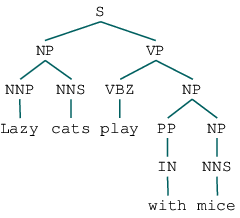

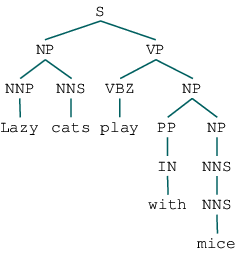

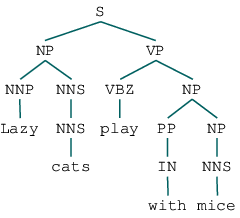

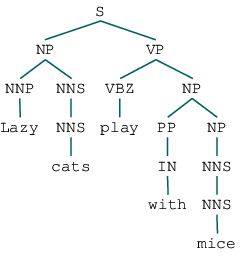

Number of edges = 34

List of Edges:

Edge 1 : [0:1] 'Lazy'
Edge 2 : [1:2] 'cats'
Edge 3 : [2:3] 'play'
Edge 4 : [3:4] 'with'
Edge 5 : [4:5] 'mice'
Edge 6 : [0:1] NNP -> 'Lazy' *
Edge 7 : [0:1] NP -> NNP * NNS
Edge 8 : [1:2] NNS -> 'cats' *
Edge 9 : [1:2] NP -> NNS *
Edge 10 : [1:2] NNS -> NNS *
Edge 11 : [1:2] NNP -> NNS *
Edge 12 : [0:2] NP -> NNP NNS *
Edge 13 : [0:2] S  -> NP * VP
Edge 14 : [1:2] NP -> NNP * NNS
Edge 15 : [1:2] S  -> NP * VP
Edge 16 : [2:3] VBZ -> 'play' *
Edge 17 : [2:3] VP -> VBZ *
Edge 18 : [2:3] VP -> VBZ * NP
Edge 19 : [0:3] S  -> NP VP *
Edge 20 : [1:3] S  -> NP VP *
Edge 21 : [3:4] IN -> 'with' *
Edge 22 : [3:4] PP -> IN *
Edge 23 : [3:4] NP -> PP * NP
Edge 24 : [4:5] NNS -> 'mice' *
Edge 25 : [4:5] NP -> NNS *
Edge 26 : [4:5] NNS -> NNS *
Edge 27 : [4:5] NNP -> NNS *
Edge 28 : [4:5] NP -> NNP * NNS
Edge 29 : [4:5] S  -> NP * VP
Edge 30 : [3:5] NP -> PP NP *
Edge 31 : [3:5] S  -> NP * VP
Edge 32 : [2:5] VP -> VBZ NP *
Edge 33 : [0:5] S  -> NP VP *
Edge 34 : 

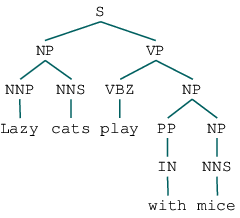

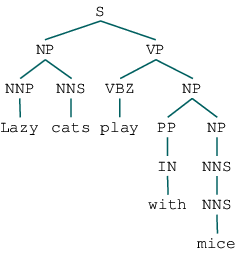

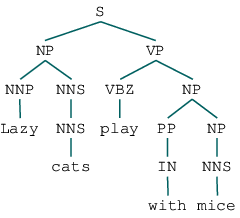

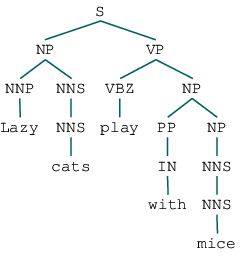

Number of edges = 56

List of Edges:

Edge 1 : [0:1] 'Lazy'
Edge 2 : [1:2] 'cats'
Edge 3 : [2:3] 'play'
Edge 4 : [3:4] 'with'
Edge 5 : [4:5] 'mice'
Edge 6 : [0:0] NNP -> * 'Lazy'
Edge 7 : [0:1] NNP -> 'Lazy' *
Edge 8 : [0:0] NP -> * NNP NNS
Edge 9 : [0:1] NP -> NNP * NNS
Edge 10 : [1:1] NNS -> * 'cats'
Edge 11 : [1:2] NNS -> 'cats' *
Edge 12 : [1:1] NP -> * NNS
Edge 13 : [1:1] NNS -> * NNS
Edge 14 : [1:1] NNP -> * NNS
Edge 15 : [0:2] NP -> NNP NNS *
Edge 16 : [1:2] NP -> NNS *
Edge 17 : [1:2] NNS -> NNS *
Edge 18 : [1:2] NNP -> NNS *
Edge 19 : [1:1] NP -> * NNP NNS
Edge 20 : [1:2] NP -> NNP * NNS
Edge 21 : [1:1] S  -> * NP VP
Edge 22 : [1:2] S  -> NP * VP
Edge 23 : [0:0] S  -> * NP VP
Edge 24 : [0:2] S  -> NP * VP
Edge 25 : [2:2] VBZ -> * 'play'
Edge 26 : [2:3] VBZ -> 'play' *
Edge 27 : [2:2] VP -> * VBZ
Edge 28 : [2:2] VP -> * VBZ NP
Edge 29 : [2:3] VP -> VBZ *
Edge 30 : [2:3] VP -> VBZ * NP
Edge 31 : [1:3] S  -> NP VP *
Edge 32 : [0:3] S  -> NP VP *
Edge 33 : [3:3] IN -> * 'with'
Edg

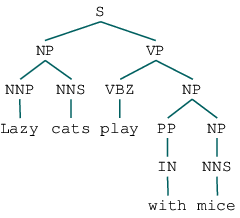

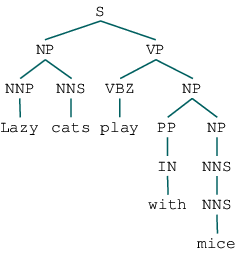

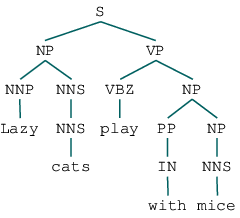

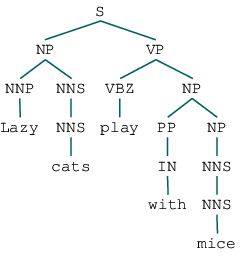

Number of edges = 34

List of Edges:

Edge 1 : [0:1] 'Lazy'
Edge 2 : [1:2] 'cats'
Edge 3 : [2:3] 'play'
Edge 4 : [3:4] 'with'
Edge 5 : [4:5] 'mice'
Edge 6 : [0:1] NNP -> 'Lazy' *
Edge 7 : [0:1] NP -> NNP * NNS
Edge 8 : [1:2] NNS -> 'cats' *
Edge 9 : [1:2] NP -> NNS *
Edge 10 : [1:2] NNS -> NNS *
Edge 11 : [1:2] NNP -> NNS *
Edge 12 : [0:2] NP -> NNP NNS *
Edge 13 : [0:2] S  -> NP * VP
Edge 14 : [1:2] NP -> NNP * NNS
Edge 15 : [1:2] S  -> NP * VP
Edge 16 : [2:3] VBZ -> 'play' *
Edge 17 : [2:3] VP -> VBZ *
Edge 18 : [2:3] VP -> VBZ * NP
Edge 19 : [0:3] S  -> NP VP *
Edge 20 : [1:3] S  -> NP VP *
Edge 21 : [3:4] IN -> 'with' *
Edge 22 : [3:4] PP -> IN *
Edge 23 : [3:4] NP -> PP * NP
Edge 24 : [4:5] NNS -> 'mice' *
Edge 25 : [4:5] NP -> NNS *
Edge 26 : [4:5] NNS -> NNS *
Edge 27 : [4:5] NNP -> NNS *
Edge 28 : [4:5] NP -> NNP * NNS
Edge 29 : [4:5] S  -> NP * VP
Edge 30 : [3:5] NP -> PP NP *
Edge 31 : [3:5] S  -> NP * VP
Edge 32 : [2:5] VP -> VBZ NP *
Edge 33 : [0:5] S  -> NP VP *
Edge 34 : 

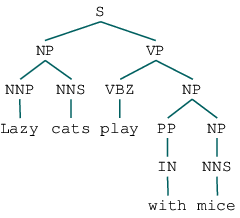

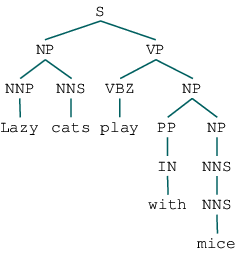

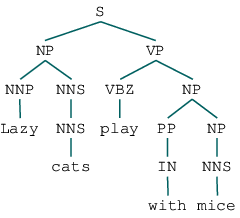

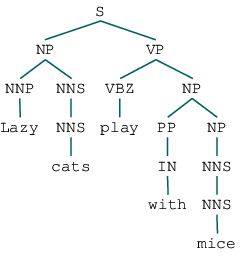

Number of edges = 30

List of Edges:

Edge 1 : [0:1] 'Lazy'
Edge 2 : [1:2] 'cats'
Edge 3 : [2:3] 'play'
Edge 4 : [3:4] 'with'
Edge 5 : [4:5] 'mice'
Edge 6 : [0:1] NNP -> 'Lazy' *
Edge 7 : [0:1] NP -> NNP * NNS
Edge 8 : [1:2] NNS -> 'cats' *
Edge 9 : [1:2] NP -> NNS *
Edge 10 : [1:2] NNS -> NNS *
Edge 11 : [1:2] NNP -> NNS *
Edge 12 : [0:2] NP -> NNP NNS *
Edge 13 : [0:2] S  -> NP * VP
Edge 14 : [1:2] S  -> NP * VP
Edge 15 : [2:3] VBZ -> 'play' *
Edge 16 : [2:3] VP -> VBZ *
Edge 17 : [2:3] VP -> VBZ * NP
Edge 18 : [0:3] S  -> NP VP *
Edge 19 : [1:3] S  -> NP VP *
Edge 20 : [3:4] IN -> 'with' *
Edge 21 : [3:4] PP -> IN *
Edge 22 : [3:4] NP -> PP * NP
Edge 23 : [4:5] NNS -> 'mice' *
Edge 24 : [4:5] NP -> NNS *
Edge 25 : [4:5] NNS -> NNS *
Edge 26 : [4:5] NNP -> NNS *
Edge 27 : [3:5] NP -> PP NP *
Edge 28 : [2:5] VP -> VBZ NP *
Edge 29 : [0:5] S  -> NP VP *
Edge 30 : [1:5] S  -> NP VP *

Words Filtered = 4

[4:5] S  -> NP * VP
[1:2] NP -> NNP * NNS
[3:5] S  -> NP * VP
[4:5] NP -> NNP * NNS

In [9]:
L_CP, L_BU, L_BUL, L_LCC, list_of_dicts = get_all_parsers(MY_GRAMMAR, MY_SENTENCE)

In [19]:
import matplotlib.pyplot as plt
df = get_df_parse(list_of_dicts)
df['Time per Edge'] = df['Time'] / df['Edges']
df.sort_values('Time',ascending=True).set_index('Name')

,Trees,Edges,Omitted,Time,Time per Edge
Name,,,,,
LC_CP,4,30,4.0,0.003845,0.000128
CHART_PARSE,4,34,0.0,0.004105,0.000121
BULC_CP,4,34,0.0,0.004325,0.000127
BU_CP,4,56,22.0,0.010516,0.000188


# Report 

## Evaluation 
Using the different parsers shows a different approach on how to "attack" the parsing tree. We've seen that we can make an extend a sentence's grammar by introducing "ambiguity", this means that the structure of the parsed tree can vary. In this example we showed that we can extend the grammar of a sentence to produce 4 different trees.

Using the different parsers, we can see that the number of edges varies as well as the number of omitted edges. We can see in the dataframe head above, that two parsers produced the same number of edges (ChartParser and BottomUpLeftCornerChartParser), since they had the same number of edges, they didn't omit any edges (and the ChartParser didn't omit any since it was used as a baseline to compare). 

What's interesting to see is that the BottomUpChartParser and the LeftCornerChartParser had more and less edges respectively (56, and 30). With the BottomUpChartParser there are 22 edges which are omitted from the original one since it has to traverse through more nodes and leaves of the tree. Whilst the LeftCornerChartParser had less edges, meaning it was able to parse the tree faster. However, what is interesting to note, is that timing the parsers, we can see that the fastest parser was the LeftCornerChartParser which had the least number of edges. On the other hand, if we divide the time by the number of edges, we can see that the ChartParser takes less time per edge. 


Lastly, what we see is that the LeftCornerChartParser and the BottomUpChartParser both filter out edges. For the LeftCornerChartParser, we see that it filters out edges without any new word sumsumptions. Such that if we already have [0,1]: B --> b, and [1,2]: Y --> y, then [0,1]:A --> B.Y is filtered out.